In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Real-Time_Traffic_Incident_Reports_20250818.csv")

In [3]:
df = df[
    (df['Latitude'] != 0) & 
    (df['Longitude'] != 0) & 
    (df['Latitude'].between(30.1, 30.5)) &
    (df['Longitude'].between(-98.0,-97.5))
]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416469 entries, 0 to 434150
Data columns (total 10 columns):
Traffic Report ID    416469 non-null object
Published Date       416469 non-null object
Issue Reported       416469 non-null object
Location             416469 non-null object
Latitude             416469 non-null float64
Longitude            416469 non-null float64
Address              416469 non-null object
Status               414852 non-null object
Status Date          416469 non-null object
Agency               73791 non-null object
dtypes: float64(2), object(8)
memory usage: 35.0+ MB


In [5]:
df.describe()

,Latitude,Longitude
count,416469.000000,416469.000000
mean,30.301905,-97.728140
std,0.091030,0.080276
min,30.100006,-97.999993
25%,30.231756,-97.773413
50%,30.294128,-97.731763
75%,30.373504,-97.682482
max,30.499997,-97.500032


In [6]:
df["Published Date"] = pd.to_datetime(df["Published Date"])


In [7]:
highway_keywords = ["I-35", "IH-35", "US 183", "Mopac", "Loop 1", "SH 71","IH 35"]

df ['road_type'] = df ['Address'].fillna("").str.upper().apply(
    lambda x: "Highway" if any (k.upper() in x for k in highway_keywords) else "Local")


print (df['road_type'].value_counts())


Local      333264
Highway     83205
Name: road_type, dtype: int64


In [16]:
!pip install scikit-learn --user 



You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features and labels



X = df['Address'].fillna("")
y = (df['road_type'] == "Highway").astype(int)



# Text to numeric features
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train Logistic Regression
clf = LogisticRegression(max_iter=400)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66652
           1       1.00      1.00      1.00     16642

    accuracy                           1.00     83294
   macro avg       1.00      1.00      1.00     83294
weighted avg       1.00      1.00      1.00     83294



In [10]:
df.head(50)

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,road_type
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,2024-03-06 01:29:39+00:00,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD,Highway
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,2024-03-06 01:26:42+00:00,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD,Highway
3,A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...,2020-04-10 21:31:11+00:00,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp,ARCHIVED,04/10/2020 09:55:03 PM +0000,NaN,Local
4,4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...,2022-06-04 17:51:05+00:00,Traffic Hazard,POINT (-97.825791 30.455444),30.455444,-97.825791,Anderson Mill Rd & N Fm 620 Rd,ARCHIVED,06/04/2022 06:20:03 PM +0000,NaN,Local
5,388082EEB5EE93B2E562236F9D37CD0B5D74F08E_17096...,2024-03-06 01:35:18+00:00,COLLISION,POINT (-97.823787 30.139435),30.139435,-97.823787,665 W FM 1626 TO STATION,ARCHIVED,03/06/2024 02:35:11 AM +0000,TRAVIS COUNTY SHERIF,Local
6,09203A0B810D0C054F3F15D6DB42AA850BEA9174_17096...,2024-03-05 23:34:06+00:00,Crash Urgent,POINT (-97.810932 30.475283),30.475283,-97.810932,2787 S Lakeline Blvd,ARCHIVED,03/06/2024 12:25:11 AM +0000,AUSTIN PD,Local
7,0864A91883AB86909614F36A588EE81376A25C45_17096...,2024-03-05 23:53:01+00:00,COLLISION,POINT (-97.666111 30.453168),30.453168,-97.666111,15700 N Ih 35 Nb,ARCHIVED,03/06/2024 12:30:12 AM +0000,TRAVIS COUNTY SHERIF,Highway
8,EE79CFC6DDF6B115A67C91FA940471B9FE90429B_17096...,2024-03-06 03:00:18+00:00,TRFC HAZD/ DEBRIS,POINT (-97.728051 30.159536),30.159536,-97.728051,7513 MC KINNEY FALLS PKWY,ARCHIVED,03/06/2024 03:10:11 AM +0000,TRAVIS COUNTY SHERIF,Local
9,619683DB9EF9D4649743EE1DEDDB3923D6E5F704_17096...,2024-03-06 02:27:05+00:00,Traffic Hazard,POINT (-97.709495 30.260127),30.260127,-97.709495,E 7th St / N Pleasant Valley Rd,ARCHIVED,03/06/2024 03:20:11 AM +0000,AUSTIN PD,Local
10,9F06007D02B7DA59126A69422F135FCEE39E7652_17096...,2024-03-06 01:09:41+00:00,COLLISION,POINT (-97.830282 30.140551),30.140551,-97.830282,910-1001 W FM 1626 RD,ARCHIVED,03/06/2024 01:55:11 AM +0000,TRAVIS COUNTY SHERIF,Local


Accuracy: 0.9976829063317886


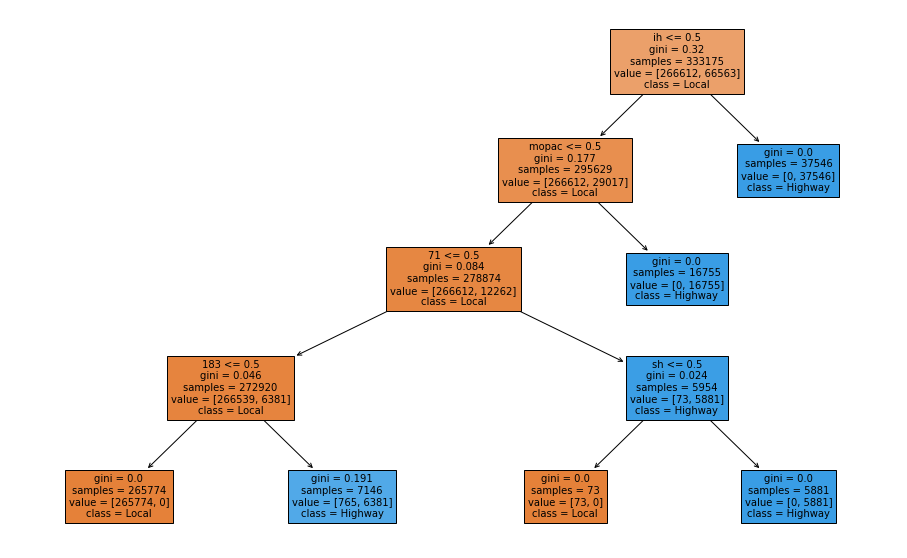

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

print("Accuracy:", tree.score(X_test, y_test))

plt.figure(figsize=(16,10))
plot_tree(tree, feature_names=vectorizer.get_feature_names_out(),
          class_names=["Local", "Highway"], filled=True, fontsize=10)
plt.show()



In [12]:
# Preview
print(df.head())
# Select useful features for clustering
data = df[['Latitude', 'Longitude', 'Published Date']].dropna()
# Convert published_date to hour of day (feature engineering)
data['Published Date'] = pd.to_datetime(data['Published Date'])
data['Hour'] = data['Published Date'].dt.hour
# Keep only features for clustering
X = data[['Latitude', 'Longitude','Hour']]

print(X)


                                   Traffic Report ID  \
0  F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...   
1  042338D46C2028808F298DEC735DC7ADF0C162F6_17096...   
3  A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...   
4  4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...   
5  388082EEB5EE93B2E562236F9D37CD0B5D74F08E_17096...   

             Published Date     Issue Reported                      Location  \
0 2024-03-06 01:29:39+00:00    Stalled Vehicle   POINT (-97.705874 30.32358)   
1 2024-03-06 01:26:42+00:00       Crash Urgent  POINT (-97.698567 30.342505)   
3 2020-04-10 21:31:11+00:00  TRFC HAZD/ DEBRIS  POINT (-97.866676 30.140878)   
4 2022-06-04 17:51:05+00:00     Traffic Hazard  POINT (-97.825791 30.455444)   
5 2024-03-06 01:35:18+00:00          COLLISION  POINT (-97.823787 30.139435)   

    Latitude  Longitude                                            Address  \
0  30.323580 -97.705874  E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...   
1  30.342505 -97.698567   

In [13]:
df['Year'] = pd.to_datetime(df['Published Date']).apply(lambda x: x.year)
df['Hour'] = pd.to_datetime(df['Published Date']).apply(lambda x: x.hour )
df['Hour_rush'] = (df['Hour']).apply(lambda x: (7 <= x <= 9) or  (16 <= x <= 18)  )


In [21]:
from sklearn.preprocessing import StandardScaler

# Ahora sí puedes usarlo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.23811141  0.27736748 -1.7524572 ]
 [ 0.44600954  0.36839088 -1.7524572 ]
 [-1.76893768 -1.72574528  1.02290509]
 ...
 [-0.90287307 -0.37419663  0.60660074]
 [-0.53294073  1.55249235  0.60660074]
 [ 1.55924498 -0.1758436   0.74536886]]


In [25]:

# Choose number of clusters (k)
from sklearn.cluster import KMeans

k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to data
data['cluster'] = clusters



In [24]:
data

,Latitude,Longitude,Published Date,Hour,cluster
0,30.323580,-97.705874,2024-03-06 01:29:39+00:00,1,2
1,30.342505,-97.698567,2024-03-06 01:26:42+00:00,1,16
3,30.140878,-97.866676,2020-04-10 21:31:11+00:00,21,13
4,30.455444,-97.825791,2022-06-04 17:51:05+00:00,17,22
5,30.139435,-97.823787,2024-03-06 01:35:18+00:00,1,45
6,30.475283,-97.810932,2024-03-05 23:34:06+00:00,23,22
7,30.453168,-97.666111,2024-03-05 23:53:01+00:00,23,29
8,30.159536,-97.728051,2024-03-06 03:00:18+00:00,3,45
9,30.260127,-97.709495,2024-03-06 02:27:05+00:00,2,34
10,30.140551,-97.830282,2024-03-06 01:09:41+00:00,1,45


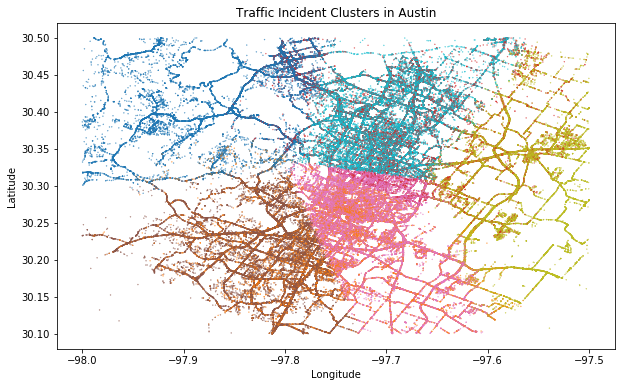

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['cluster'], cmap='tab10', s=0.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Traffic Incident Clusters in Austin")
plt.show()


In [74]:
from sklearn.cluster import DBSCAN

# eps = neighborhood size, min_samples = points to form a dense cluster
dbscan = DBSCAN(eps=0.0276, min_samples=5)  
clusters = dbscan.fit_predict(X_scaled)
# Add results to dataframe
data['cluster'] = clusters

data_sorted = data['cluster'].value_counts().sort_index()
print(data_sorted)

total_points = len(data)
outliers = (data['cluster'] == -1).sum()
real_clusters = len([x for x in data['cluster'].unique() if x != -1])


-1       66929
 0        4735
 1         116
 2         636
 3        1419
 4        4575
 5          26
 6          39
 7         119
 8          47
 9       16870
 10         33
 11         29
 12          6
 13        314
 14         74
 15      10084
 16       3701
 17       2016
 18         24
 19      11023
 20      13323
 21          7
 22      11130
 23        128
 24         21
 25       8882
 26        135
 27         61
 28         67
         ...  
 9594        5
 9595        5
 9596        6
 9597        5
 9598        5
 9599        6
 9600        5
 9601        4
 9602        5
 9603        5
 9604        5
 9605        5
 9606        5
 9607        5
 9608        3
 9609        5
 9610        5
 9611        5
 9612        5
 9613        5
 9614        5
 9615        5
 9616        5
 9617        5
 9618        5
 9619        5
 9620        4
 9621        5
 9622        5
 9623        6
Name: cluster, Length: 9625, dtype: int64


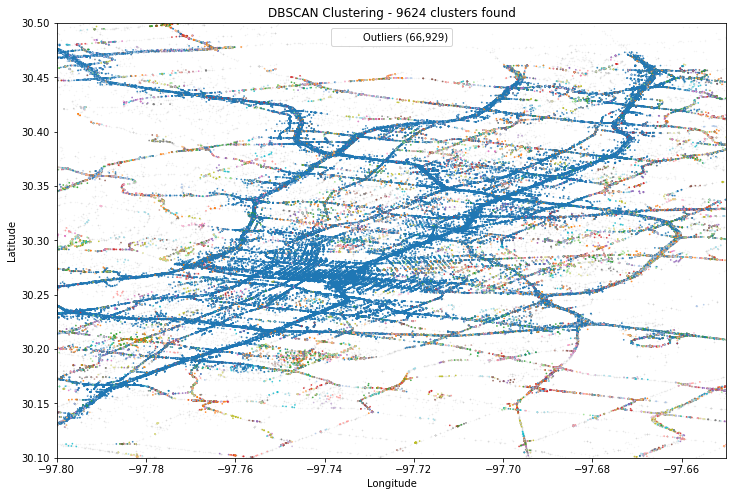

In [75]:
plt.figure(figsize=(12,8))

# Separar outliers de clusters
outliers_data = data[data['cluster'] == -1]
clusters_data = data[data['cluster'] != -1]

# Plotear outliers en gris claro
if len(outliers_data) > 0:
    plt.scatter(outliers_data['Longitude'], outliers_data['Latitude'], 
               c='lightgray', s=0.1, alpha=0.3, label=f'Outliers ({len(outliers_data):,})')

# Plotear clusters con colores vibrantes
if len(clusters_data) > 0:
    plt.scatter(clusters_data['Longitude'], clusters_data['Latitude'], 
               c=clusters_data['cluster'], cmap='tab20', s=0.5, alpha=0.8)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"DBSCAN Clustering - {real_clusters} clusters found")
plt.xlim(-97.8, -97.65)
plt.ylim(30.1, 30.5)
plt.legend()
plt.show()